In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  5.74it/s]

13it [00:00,  8.04it/s]

19it [00:00, 10.86it/s]

31it [00:00, 14.90it/s]

43it [00:00, 20.20it/s]

52it [00:00, 25.31it/s]

61it [00:00, 31.94it/s]

72it [00:00, 40.49it/s]

85it [00:01, 50.87it/s]

97it [00:01, 61.50it/s]

110it [00:01, 72.99it/s]

124it [00:01, 83.97it/s]

138it [00:01, 94.18it/s]

151it [00:01, 102.04it/s]

164it [00:01, 99.27it/s] 

177it [00:01, 105.24it/s]

190it [00:01, 110.65it/s]

203it [00:02, 114.69it/s]

216it [00:02, 118.10it/s]

229it [00:02, 119.95it/s]

242it [00:02, 121.72it/s]

255it [00:02, 123.32it/s]

268it [00:02, 124.32it/s]

281it [00:02, 122.94it/s]

294it [00:02, 123.18it/s]

307it [00:02, 122.48it/s]

320it [00:02, 122.48it/s]

333it [00:03, 122.39it/s]

346it [00:03, 124.41it/s]

359it [00:03, 124.90it/s]

372it [00:03, 126.04it/s]

385it [00:03, 126.65it/s]

398it [00:03, 126.59it/s]

411it [00:03, 127.43it/s]

424it [00:03, 127.93it/s]

437it [00:03, 128.03it/s]

450it [00:03, 127.67it/s]

463it [00:04, 126.98it/s]

476it [00:04, 117.00it/s]

490it [00:04, 121.15it/s]

504it [00:04, 124.57it/s]

518it [00:04, 126.80it/s]

531it [00:04, 127.39it/s]

545it [00:04, 125.02it/s]

558it [00:04, 122.97it/s]

571it [00:04, 120.98it/s]

584it [00:05, 122.86it/s]

597it [00:05, 113.33it/s]

609it [00:05, 102.96it/s]

622it [00:05, 108.96it/s]

635it [00:05, 114.12it/s]

648it [00:05, 117.68it/s]

661it [00:05, 119.51it/s]

674it [00:05, 117.41it/s]

688it [00:05, 121.00it/s]

702it [00:06, 123.90it/s]

715it [00:06, 125.20it/s]

729it [00:06, 127.29it/s]

742it [00:06, 127.86it/s]

756it [00:06, 128.55it/s]

770it [00:06, 129.03it/s]

783it [00:06, 128.80it/s]

796it [00:06, 128.73it/s]

809it [00:06, 127.38it/s]

822it [00:07, 126.93it/s]

835it [00:07, 126.81it/s]

848it [00:07, 126.62it/s]

861it [00:07, 127.30it/s]

874it [00:07, 127.27it/s]

887it [00:07, 126.97it/s]

900it [00:07, 122.80it/s]

913it [00:07, 123.11it/s]

926it [00:07, 123.90it/s]

939it [00:07, 125.04it/s]

952it [00:08, 124.26it/s]

965it [00:08, 125.91it/s]

979it [00:08, 127.52it/s]

992it [00:08, 127.50it/s]

1005it [00:08, 110.70it/s]

1017it [00:08, 112.77it/s]

1031it [00:08, 117.69it/s]

1045it [00:08, 121.42it/s]

1058it [00:08, 123.86it/s]

1071it [00:09, 125.54it/s]

1084it [00:09, 126.18it/s]

1097it [00:09, 109.65it/s]

1109it [00:09, 109.59it/s]

1123it [00:09, 115.11it/s]

1136it [00:09, 118.02it/s]

1150it [00:09, 121.70it/s]

1163it [00:09, 122.82it/s]

1176it [00:09, 117.36it/s]

1188it [00:10, 117.03it/s]

1200it [00:10, 116.48it/s]

1213it [00:10, 119.71it/s]

1227it [00:10, 122.77it/s]

1240it [00:10, 124.76it/s]

1253it [00:10, 125.17it/s]

1267it [00:10, 127.12it/s]

1281it [00:10, 128.31it/s]

1294it [00:10, 128.68it/s]

1307it [00:10, 128.78it/s]

1320it [00:11, 128.80it/s]

1333it [00:11, 128.40it/s]

1346it [00:11, 123.20it/s]

1359it [00:11, 120.84it/s]

1372it [00:11, 122.52it/s]

1385it [00:11, 120.12it/s]

1398it [00:11, 104.18it/s]

1410it [00:11, 107.34it/s]

1424it [00:12, 113.99it/s]

1438it [00:12, 119.14it/s]

1452it [00:12, 123.39it/s]

1465it [00:12, 125.30it/s]

1478it [00:12, 122.13it/s]

1491it [00:12, 123.54it/s]

1504it [00:12, 123.00it/s]

1517it [00:12, 123.68it/s]

1530it [00:12, 124.51it/s]

1543it [00:12, 123.81it/s]

1556it [00:13, 123.48it/s]

1569it [00:13, 115.14it/s]

1583it [00:13, 119.69it/s]

1596it [00:13, 122.52it/s]

1609it [00:13, 124.32it/s]

1623it [00:13, 126.31it/s]

1636it [00:13, 126.56it/s]

1650it [00:13, 127.94it/s]

1664it [00:13, 128.64it/s]

1677it [00:14, 128.39it/s]

1690it [00:14, 126.95it/s]

1703it [00:14, 103.33it/s]

1715it [00:14, 97.32it/s] 

1726it [00:14, 98.29it/s]

1737it [00:14, 92.08it/s]

1749it [00:14, 98.39it/s]

1760it [00:14, 90.66it/s]

1773it [00:15, 98.83it/s]

1784it [00:15, 101.42it/s]

1797it [00:15, 108.45it/s]

1811it [00:15, 114.26it/s]

1825it [00:15, 118.76it/s]

1838it [00:15, 120.05it/s]

1851it [00:15, 117.92it/s]

1864it [00:15, 120.77it/s]

1877it [00:15, 117.72it/s]

1890it [00:15, 120.88it/s]

1903it [00:16, 123.13it/s]

1916it [00:16, 124.99it/s]

1929it [00:16, 125.59it/s]

1943it [00:16, 127.07it/s]

1957it [00:16, 128.20it/s]

1970it [00:16, 109.97it/s]

1982it [00:16, 111.52it/s]

1995it [00:16, 115.57it/s]

2008it [00:16, 119.19it/s]

2021it [00:17, 115.67it/s]

2033it [00:17, 109.93it/s]

2046it [00:17, 115.07it/s]

2060it [00:17, 119.03it/s]

2073it [00:17, 121.81it/s]

2086it [00:17, 122.73it/s]

2099it [00:17, 122.46it/s]

2112it [00:17, 102.69it/s]

2123it [00:18, 95.47it/s] 

2136it [00:18, 102.34it/s]

2149it [00:18, 108.80it/s]

2162it [00:18, 113.37it/s]

2175it [00:18, 117.27it/s]

2188it [00:18, 119.56it/s]

2201it [00:18, 118.87it/s]

2214it [00:18, 121.51it/s]

2227it [00:18, 123.36it/s]

2240it [00:18, 122.35it/s]

2253it [00:19, 123.09it/s]

2266it [00:19, 123.92it/s]

2279it [00:19, 118.75it/s]

2292it [00:19, 120.82it/s]

2305it [00:19, 122.34it/s]

2318it [00:19, 122.71it/s]

2332it [00:19, 125.14it/s]

2345it [00:19, 124.70it/s]

2359it [00:19, 126.47it/s]

2372it [00:20, 126.90it/s]

2385it [00:20, 127.32it/s]

2398it [00:20, 123.65it/s]

2411it [00:20, 124.97it/s]

2425it [00:20, 126.77it/s]

2438it [00:20, 126.71it/s]

2451it [00:20, 111.92it/s]

2465it [00:20, 116.95it/s]

2479it [00:20, 121.38it/s]

2492it [00:21, 123.77it/s]

2506it [00:21, 126.40it/s]

2519it [00:21, 124.69it/s]

2533it [00:21, 126.58it/s]

2547it [00:21, 127.82it/s]

2561it [00:21, 128.03it/s]

2574it [00:21, 123.82it/s]

2587it [00:21, 105.61it/s]

2599it [00:22, 93.91it/s] 

2610it [00:22, 96.19it/s]

2623it [00:22, 103.59it/s]

2636it [00:22, 109.22it/s]

2650it [00:22, 114.95it/s]

2663it [00:22, 117.68it/s]

2676it [00:22, 118.79it/s]

2689it [00:22, 118.64it/s]

2703it [00:22, 122.14it/s]

2716it [00:22, 124.36it/s]

2730it [00:23, 126.09it/s]

2744it [00:23, 128.24it/s]

2758it [00:23, 129.28it/s]

2771it [00:23, 123.47it/s]

2784it [00:23, 125.27it/s]

2798it [00:23, 126.87it/s]

2811it [00:23, 127.33it/s]

2824it [00:23, 127.77it/s]

2838it [00:23, 129.34it/s]

2851it [00:24, 122.91it/s]

2864it [00:24, 123.94it/s]

2877it [00:24, 124.77it/s]

2890it [00:24, 113.72it/s]

2902it [00:24, 110.68it/s]

2914it [00:24, 112.42it/s]

2927it [00:24, 115.82it/s]

2940it [00:24, 118.73it/s]

2953it [00:24, 120.53it/s]

2966it [00:24, 121.87it/s]

2979it [00:25, 122.33it/s]

2993it [00:25, 124.76it/s]

3006it [00:25, 125.99it/s]

3020it [00:25, 128.07it/s]

3034it [00:25, 129.28it/s]

3048it [00:25, 129.97it/s]

3062it [00:25, 130.39it/s]

3076it [00:25, 129.53it/s]

3089it [00:25, 129.50it/s]

3102it [00:26, 128.30it/s]

3115it [00:26, 123.99it/s]

3128it [00:26, 111.49it/s]

3141it [00:26, 114.23it/s]

3154it [00:26, 118.08it/s]

3167it [00:26, 121.33it/s]

3180it [00:26, 121.48it/s]

3193it [00:26, 123.40it/s]

3206it [00:26, 124.55it/s]

3219it [00:27, 118.80it/s]

3231it [00:27, 118.68it/s]

3243it [00:27, 107.09it/s]

3254it [00:27, 100.87it/s]

3266it [00:27, 104.34it/s]

3277it [00:27, 95.47it/s] 

3287it [00:27, 93.97it/s]

3300it [00:27, 102.04it/s]

3313it [00:27, 108.58it/s]

3326it [00:28, 113.72it/s]

3338it [00:28, 113.47it/s]

3352it [00:28, 118.11it/s]

3366it [00:28, 121.78it/s]

3379it [00:28, 123.22it/s]

3392it [00:28, 124.04it/s]

3405it [00:28, 122.78it/s]

3418it [00:28, 123.81it/s]

3432it [00:28, 126.14it/s]

3445it [00:29, 127.02it/s]

3458it [00:29, 126.74it/s]

3471it [00:29, 125.87it/s]

3484it [00:29, 126.33it/s]

3497it [00:29, 119.13it/s]

3510it [00:29, 105.54it/s]

3523it [00:29, 109.90it/s]

3536it [00:29, 114.36it/s]

3549it [00:29, 117.49it/s]

3562it [00:30, 118.91it/s]

3575it [00:30, 110.75it/s]

3588it [00:30, 115.12it/s]

3601it [00:30, 117.52it/s]

3613it [00:30, 117.55it/s]

3625it [00:30, 117.04it/s]

3637it [00:30, 114.00it/s]

3649it [00:30, 114.75it/s]

3661it [00:30, 99.36it/s] 

3673it [00:31, 104.15it/s]

3686it [00:31, 110.68it/s]

3699it [00:31, 115.34it/s]

3713it [00:31, 119.47it/s]

3727it [00:31, 123.03it/s]

3740it [00:31, 124.66it/s]

3753it [00:31, 126.03it/s]

3766it [00:31, 126.73it/s]

3780it [00:31, 127.64it/s]

3793it [00:31, 128.24it/s]

3806it [00:32, 128.09it/s]

3819it [00:32, 127.90it/s]

3833it [00:32, 128.83it/s]

3846it [00:32, 128.55it/s]

3860it [00:32, 129.51it/s]

3873it [00:32, 129.11it/s]

3886it [00:32, 128.12it/s]

3899it [00:32, 128.01it/s]

3913it [00:32, 128.78it/s]

3926it [00:33, 128.35it/s]

3939it [00:33, 128.54it/s]

3953it [00:33, 129.04it/s]

3966it [00:33, 127.64it/s]

3979it [00:33, 127.64it/s]

3992it [00:33, 128.03it/s]

4005it [00:33, 128.51it/s]

4018it [00:33, 122.08it/s]

4031it [00:33, 122.26it/s]

4044it [00:33, 124.37it/s]

4057it [00:34, 122.76it/s]

4070it [00:34, 124.37it/s]

4083it [00:34, 125.77it/s]

4097it [00:34, 127.04it/s]

4110it [00:34, 124.62it/s]

4123it [00:34, 125.01it/s]

4136it [00:34, 125.47it/s]

4149it [00:34, 125.61it/s]

4162it [00:34, 125.78it/s]

4175it [00:34, 126.65it/s]

4188it [00:35, 126.93it/s]

4201it [00:35, 126.70it/s]

4214it [00:35, 125.84it/s]

4227it [00:35, 124.71it/s]

4240it [00:35, 126.11it/s]

4253it [00:35, 125.61it/s]

4266it [00:35, 125.07it/s]

4279it [00:35, 124.91it/s]

4292it [00:35, 122.94it/s]

4305it [00:36, 122.15it/s]

4318it [00:36, 116.69it/s]

4322it [00:36, 119.40it/s]


0it [00:00, ?it/s]

13it [00:00, 126.29it/s]

Number of empty sat catalogs is 0


26it [00:00, 125.31it/s]

40it [00:00, 127.16it/s]

53it [00:00, 127.69it/s]

67it [00:00, 128.69it/s]

78it [00:00, 117.18it/s]

92it [00:00, 121.05it/s]

106it [00:00, 124.48it/s]

118it [00:00, 111.29it/s]

130it [00:01, 112.27it/s]

143it [00:01, 116.63it/s]

155it [00:01, 105.93it/s]

168it [00:01, 111.85it/s]

182it [00:01, 116.92it/s]

196it [00:01, 121.54it/s]

210it [00:01, 125.69it/s]

223it [00:01, 122.92it/s]

236it [00:02, 107.05it/s]

248it [00:02, 101.25it/s]

262it [00:02, 109.10it/s]

276it [00:02, 115.44it/s]

288it [00:02, 94.79it/s] 

300it [00:02, 100.68it/s]

311it [00:02, 91.27it/s] 

323it [00:02, 97.36it/s]

337it [00:02, 106.26it/s]

351it [00:03, 113.61it/s]

365it [00:03, 118.67it/s]

378it [00:03, 120.73it/s]

392it [00:03, 123.99it/s]

405it [00:03, 125.67it/s]

419it [00:03, 128.06it/s]

433it [00:03, 131.24it/s]

447it [00:03, 132.64it/s]

461it [00:03, 132.43it/s]

475it [00:04, 132.50it/s]

489it [00:04, 133.44it/s]

503it [00:04, 134.55it/s]

517it [00:04, 133.01it/s]

531it [00:04, 132.21it/s]

545it [00:04, 130.75it/s]

559it [00:04, 131.93it/s]

573it [00:04, 132.78it/s]

587it [00:04, 132.57it/s]

601it [00:04, 126.90it/s]

615it [00:05, 128.90it/s]

629it [00:05, 130.58it/s]

643it [00:05, 131.71it/s]

657it [00:05, 131.02it/s]

671it [00:05, 123.03it/s]

684it [00:05, 83.58it/s] 

698it [00:05, 94.50it/s]

712it [00:06, 103.85it/s]

726it [00:06, 110.85it/s]

740it [00:06, 117.63it/s]

754it [00:06, 122.53it/s]

768it [00:06, 126.26it/s]

782it [00:06, 127.37it/s]

796it [00:06, 130.61it/s]

810it [00:06, 131.84it/s]

824it [00:06, 131.79it/s]

838it [00:06, 129.51it/s]

852it [00:07, 130.75it/s]

866it [00:07, 130.84it/s]

880it [00:07, 131.25it/s]

894it [00:07, 132.46it/s]

908it [00:07, 133.38it/s]

922it [00:07, 133.00it/s]

936it [00:07, 133.99it/s]

950it [00:07, 134.13it/s]

964it [00:07, 134.46it/s]

978it [00:08, 135.41it/s]

992it [00:08, 136.19it/s]

1006it [00:08, 136.62it/s]

1021it [00:08, 137.77it/s]

1035it [00:08, 132.36it/s]

1049it [00:08, 132.69it/s]

1063it [00:08, 132.58it/s]

1077it [00:08, 134.48it/s]

1091it [00:08, 135.59it/s]

1105it [00:08, 133.16it/s]

1119it [00:09, 135.06it/s]

1134it [00:09, 137.36it/s]

1149it [00:09, 138.08it/s]

1163it [00:09, 138.40it/s]

1177it [00:09, 138.87it/s]

1191it [00:09, 138.48it/s]

1205it [00:09, 129.37it/s]

1219it [00:09, 131.94it/s]

1233it [00:09, 128.93it/s]

1247it [00:10, 131.30it/s]

1262it [00:10, 133.67it/s]

1276it [00:10, 134.60it/s]

1290it [00:10, 135.10it/s]

1304it [00:10, 136.06it/s]

1318it [00:10, 136.14it/s]

1332it [00:10, 134.64it/s]

1346it [00:10, 135.39it/s]

1360it [00:10, 134.54it/s]

1374it [00:10, 133.12it/s]

1388it [00:11, 116.71it/s]

1401it [00:11, 118.87it/s]

1414it [00:11, 114.14it/s]

1428it [00:11, 120.63it/s]

1443it [00:11, 125.99it/s]

1457it [00:11, 129.73it/s]

1471it [00:11, 132.33it/s]

1486it [00:11, 134.58it/s]

1500it [00:11, 128.20it/s]

1513it [00:12, 124.35it/s]

1527it [00:12, 128.30it/s]

1541it [00:12, 131.38it/s]

1555it [00:12, 133.14it/s]

1569it [00:12, 134.23it/s]

1583it [00:12, 134.62it/s]

1597it [00:12, 134.24it/s]

1611it [00:12, 134.11it/s]

1625it [00:12, 133.80it/s]

1639it [00:13, 130.92it/s]

1653it [00:13, 132.20it/s]

1667it [00:13, 129.42it/s]

1681it [00:13, 131.93it/s]

1695it [00:13, 118.85it/s]

1708it [00:13, 114.51it/s]

1720it [00:13, 115.84it/s]

1734it [00:13, 121.71it/s]

1748it [00:13, 126.25it/s]

1761it [00:14, 110.86it/s]

1773it [00:14, 104.44it/s]

1784it [00:14, 100.71it/s]

1797it [00:14, 106.35it/s]

1811it [00:14, 114.25it/s]

1825it [00:14, 120.70it/s]

1839it [00:14, 125.31it/s]

1853it [00:14, 129.17it/s]

1867it [00:14, 123.09it/s]

1881it [00:15, 126.22it/s]

1895it [00:15, 129.35it/s]

1909it [00:15, 131.95it/s]

1923it [00:15, 132.88it/s]

1937it [00:15, 133.66it/s]

1951it [00:15, 134.61it/s]

1965it [00:15, 135.43it/s]

1979it [00:15, 134.84it/s]

1993it [00:15, 134.64it/s]

2007it [00:15, 133.89it/s]

2021it [00:16, 134.75it/s]

2035it [00:16, 128.17it/s]

2049it [00:16, 131.14it/s]

2063it [00:16, 131.84it/s]

2077it [00:16, 128.81it/s]

2091it [00:16, 131.90it/s]

2106it [00:16, 134.36it/s]

2120it [00:16, 135.75it/s]

2135it [00:16, 136.93it/s]

2149it [00:17, 131.90it/s]

2163it [00:17, 133.05it/s]

2177it [00:17, 133.39it/s]

2192it [00:17, 135.21it/s]

2206it [00:17, 136.37it/s]

2220it [00:17, 117.74it/s]

2233it [00:17, 106.26it/s]

2246it [00:17, 111.31it/s]

2258it [00:18, 104.96it/s]

2271it [00:18, 109.52it/s]

2283it [00:18, 99.23it/s] 

2295it [00:18, 103.09it/s]

2306it [00:18, 104.77it/s]

2320it [00:18, 112.57it/s]

2334it [00:18, 119.43it/s]

2349it [00:18, 124.93it/s]

2363it [00:18, 127.51it/s]

2376it [00:19, 113.84it/s]

2390it [00:19, 119.88it/s]

2403it [00:19, 122.41it/s]

2416it [00:19, 110.79it/s]

2428it [00:19, 104.56it/s]

2442it [00:19, 111.47it/s]

2456it [00:19, 117.88it/s]

2470it [00:19, 122.73it/s]

2484it [00:19, 125.06it/s]

2497it [00:20, 121.82it/s]

2511it [00:20, 126.08it/s]

2526it [00:20, 129.71it/s]

2540it [00:20, 131.10it/s]

2554it [00:20, 132.32it/s]

2568it [00:20, 133.97it/s]

2582it [00:20, 131.79it/s]

2596it [00:20, 114.40it/s]

2608it [00:20, 115.82it/s]

2620it [00:21, 104.72it/s]

2631it [00:21, 99.29it/s] 

2642it [00:21, 96.68it/s]

2652it [00:21, 93.17it/s]

2662it [00:21, 90.39it/s]

2676it [00:21, 100.53it/s]

2690it [00:21, 108.77it/s]

2704it [00:21, 115.78it/s]

2718it [00:21, 120.46it/s]

2732it [00:22, 123.81it/s]

2746it [00:22, 127.44it/s]

2760it [00:22, 129.22it/s]

2774it [00:22, 130.68it/s]

2788it [00:22, 132.40it/s]

2802it [00:22, 133.71it/s]

2816it [00:22, 133.16it/s]

2830it [00:22, 131.26it/s]

2844it [00:22, 132.40it/s]

2858it [00:23, 133.87it/s]

2872it [00:23, 134.49it/s]

2887it [00:23, 136.68it/s]

2901it [00:23, 136.51it/s]

2915it [00:23, 134.94it/s]

2929it [00:23, 125.65it/s]

2943it [00:23, 128.15it/s]

2957it [00:23, 129.09it/s]

2970it [00:23, 128.86it/s]

2984it [00:23, 129.28it/s]

2998it [00:24, 131.07it/s]

3012it [00:24, 98.96it/s] 

3024it [00:24, 97.67it/s]

3038it [00:24, 105.94it/s]

3050it [00:24, 109.12it/s]

3062it [00:24, 110.98it/s]

3076it [00:24, 117.12it/s]

3090it [00:24, 120.84it/s]

3104it [00:25, 124.85it/s]

3118it [00:25, 128.41it/s]

3132it [00:25, 130.78it/s]

3146it [00:25, 130.95it/s]

3160it [00:25, 130.47it/s]

3174it [00:25, 130.91it/s]

3188it [00:25, 132.41it/s]

3202it [00:25, 133.37it/s]

3216it [00:25, 134.39it/s]

3230it [00:25, 135.23it/s]

3244it [00:26, 134.08it/s]

3258it [00:26, 134.65it/s]

3272it [00:26, 135.35it/s]

3286it [00:26, 134.31it/s]

3300it [00:26, 134.86it/s]

3314it [00:26, 134.62it/s]

3328it [00:26, 133.51it/s]

3342it [00:26, 132.81it/s]

3356it [00:26, 130.04it/s]

3370it [00:27, 132.19it/s]

3384it [00:27, 129.47it/s]

3397it [00:27, 122.14it/s]

3411it [00:27, 126.34it/s]

3425it [00:27, 128.77it/s]

3439it [00:27, 129.53it/s]

3453it [00:27, 130.91it/s]

3467it [00:27, 131.83it/s]

3481it [00:27, 132.19it/s]

3495it [00:28, 132.55it/s]

3509it [00:28, 132.42it/s]

3523it [00:28, 115.00it/s]

3536it [00:28, 117.73it/s]

3549it [00:28, 120.10it/s]

3562it [00:28, 117.29it/s]

3574it [00:28, 108.25it/s]

3586it [00:28, 108.86it/s]

3598it [00:28, 99.84it/s] 

3610it [00:29, 105.04it/s]

3624it [00:29, 112.59it/s]

3638it [00:29, 119.35it/s]

3652it [00:29, 124.55it/s]

3666it [00:29, 128.12it/s]

3680it [00:29, 131.30it/s]

3695it [00:29, 133.81it/s]

3709it [00:29, 134.91it/s]

3723it [00:29, 135.39it/s]

3737it [00:30, 134.95it/s]

3751it [00:30, 135.26it/s]

3765it [00:30, 136.41it/s]

3779it [00:30, 136.36it/s]

3793it [00:30, 134.18it/s]

3807it [00:30, 132.73it/s]

3821it [00:30, 133.02it/s]

3835it [00:30, 117.86it/s]

3849it [00:30, 122.77it/s]

3863it [00:30, 126.59it/s]

3877it [00:31, 129.05it/s]

3891it [00:31, 120.34it/s]

3904it [00:31, 110.20it/s]

3916it [00:31, 107.09it/s]

3930it [00:31, 114.42it/s]

3944it [00:31, 119.57it/s]

3958it [00:31, 124.74it/s]

3972it [00:31, 127.78it/s]

3986it [00:32, 129.08it/s]

4000it [00:32, 131.00it/s]

4014it [00:32, 114.39it/s]

4027it [00:32, 117.41it/s]

4040it [00:32, 119.33it/s]

4053it [00:32, 106.48it/s]

4066it [00:32, 111.08it/s]

4080it [00:32, 117.13it/s]

4094it [00:32, 122.51it/s]

4108it [00:33, 126.63it/s]

4122it [00:33, 130.00it/s]

4136it [00:33, 132.37it/s]

4151it [00:33, 135.11it/s]

4165it [00:33, 135.72it/s]

4179it [00:33, 130.23it/s]

4193it [00:33, 127.80it/s]

4207it [00:33, 129.63it/s]

4221it [00:33, 119.84it/s]

4234it [00:34, 119.76it/s]

4248it [00:34, 125.17it/s]

4262it [00:34, 129.01it/s]

4276it [00:34, 131.33it/s]

4290it [00:34, 132.79it/s]

4304it [00:34, 133.68it/s]

4318it [00:34, 134.47it/s]

4322it [00:34, 124.64it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

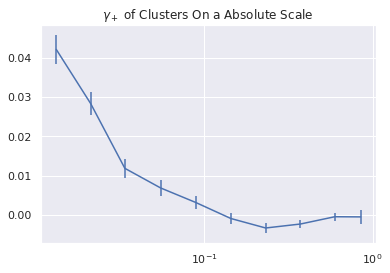

Aggregated xi:
[-32.123  -46.1376 -30.4757 -29.2178 -22.3512  11.1694  58.1169  54.2211
  12.7458   4.5475]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3292.0816  -6271.9862  -8715.7173 -12389.0767 -17198.4768 -22259.7214
 -25051.9586 -22523.4493 -12767.2177  -1338.3202]
------------------------------------------------------------------------------
Aggregated npairs:
[  761.  1627.  2572.  4272.  7100. 11481. 17120. 22818. 24649.  8133.]
------------------------------------------------------------------------------
Mean xi:
[-0.0422 -0.0284 -0.0118 -0.0068 -0.0031  0.001   0.0034  0.0024  0.0005
  0.0006]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.326  -3.8549 -3.3887 -2.9001 -2.4223 -1.9388 -1.4633 -0.9871 -0.518
 -0.1646]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

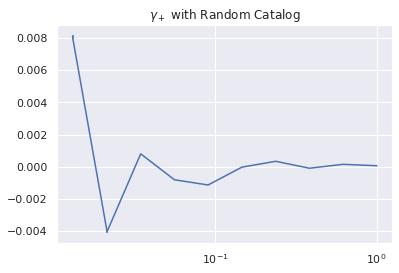

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

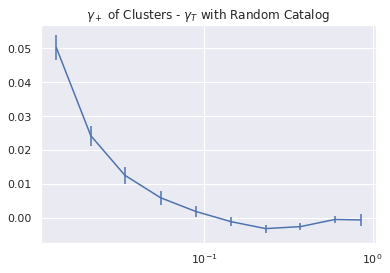

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

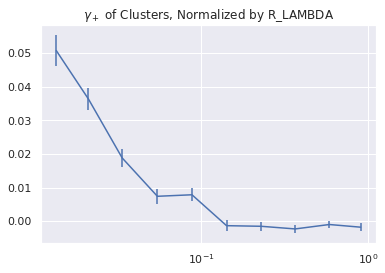

Aggregated xi:
[-21.1739 -41.1351 -39.9535 -24.3262 -43.191   12.3333  21.7691  46.7462
  25.1681  36.4253]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1794.2648  -4367.6069  -7203.8497  -9568.6451 -13376.0262 -17685.9487
 -20861.6353 -20151.127  -13193.8657  -2000.5896]
------------------------------------------------------------------------------
Aggregated npairs:
[  417.  1132.  2123.  3292.  5506.  9063. 14135. 20072. 24791. 20118.]
------------------------------------------------------------------------------
Mean xi:
[-0.0508 -0.0363 -0.0188 -0.0074 -0.0078  0.0014  0.0015  0.0023  0.001
  0.0018]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3028 -3.8583 -3.3932 -2.9066 -2.4294 -1.9514 -1.4759 -1.0039 -0.5322
 -0.0994]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)